In [122]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [123]:
initial_data = pd.read_csv('data5.csv')

In [124]:
initial_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [125]:
initial_data.drop(initial_data.columns[0], axis=1, inplace=True) #dropped id column

In [126]:
for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

In [127]:
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [128]:
initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1,'B':0})

In [129]:
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
X = initial_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

y = initial_data['diagnosis']

In [131]:
col_labels = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst'
             ]
initial_data.columns = col_labels

In [132]:
#to check if there are missing values
for c in col_labels:
    no_missing = initial_data[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

diagnosis
No missing values
 
radius_mean
No missing values
 
texture_mean
No missing values
 
perimeter_mean
No missing values
 
area_mean
No missing values
 
smoothness_mean
No missing values
 
compactness_mean
No missing values
 
concavity_mean
No missing values
 
concave_points_mean
No missing values
 
symmetry_mean
No missing values
 
fractal_dimension_mean
No missing values
 
radius_se
No missing values
 
texture_se
No missing values
 
perimeter_se
No missing values
 
area_se
No missing values
 
smoothness_se
No missing values
 
compactness_se
No missing values
 
concavity_se
No missing values
 
concave points_se
No missing values
 
symmetry_se
No missing values
 
fractal_dimension_se
No missing values
 
radius_worst
No missing values
 
texture_worst
No missing values
 
perimeter_worst
No missing values
 
area_worst
No missing values
 
smoothness_worst
No missing values
 
compactness_worst
No missing values
 
concavity_worst
No missing values
 
concave points_worst
No missing val

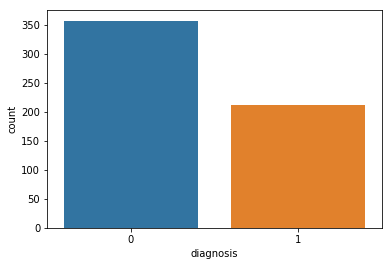

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(initial_data['diagnosis'],label="Sum")

plt.show()

In [134]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [135]:
# 1. Logistic Regression 

#filterwarnings('ignore')

#LR = LogisticRegression()

#scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
#scores = cross_validate(LR, X, y,scoring=scoring, cv=20)
#sorted(scores.keys())
#LR_fit_time = scores['fit_time'].mean()
#LR_score_time = scores['score_time'].mean()
#LR_accuracy = scores['test_accuracy'].mean()
#LR_precision = scores['test_precision_macro'].mean()
#LR_recall = scores['test_recall_macro'].mean()
#LR_f1 = scores['test_f1_weighted'].mean()
#LR_roc = scores['test_roc_auc'].mean()


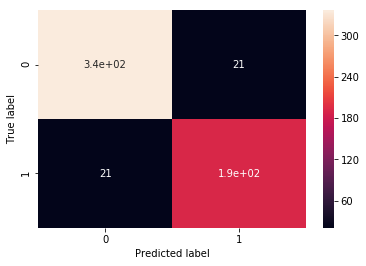

In [136]:
# 1. Logistic Regression 

filterwarnings('ignore')

LR = LogisticRegression()
y_pred = cross_val_predict(LR, X, y, cv=20)
sns.heatmap(conf_mat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
conf_mat = confusion_matrix(y, y_pred)

In [137]:
LR_acc=accuracy_score(y,y_pred)
LR_pre=precision_score(y,y_pred)
LR_recall=recall_score(y,y_pred)

In [138]:
# 2. Decision tree
#decision_tree = DecisionTreeClassifier()

#scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
#scores = cross_validate(decision_tree, X, y, scoring=scoring, cv=20)

#sorted(scores.keys())
#dtree_fit_time = scores['fit_time'].mean()
#dtree_score_time = scores['score_time'].mean()
#dtree_accuracy = scores['test_accuracy'].mean()
#dtree_precision = scores['test_precision_macro'].mean()
#dtree_recall = scores['test_recall_macro'].mean()
#dtree_f1 = scores['test_f1_weighted'].mean()
#dtree_roc = scores['test_roc_auc'].mean()

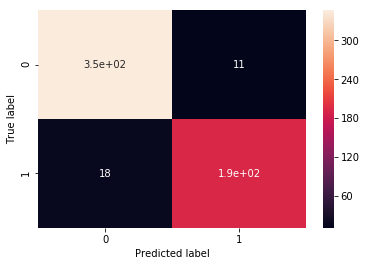

In [139]:
# 2. Decision tree

decision_tree = DecisionTreeClassifier()
y_pred = cross_val_predict(decision_tree, X, y, cv=20)

#conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
conf_mat = confusion_matrix(y, y_pred)

In [140]:
DT_acc=accuracy_score(y,y_pred)
DT_pre=precision_score(y,y_pred)
DT_recall=recall_score(y,y_pred)

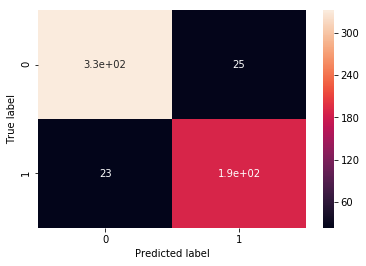

In [141]:
# 3.K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
y_pred = cross_val_predict(knn, X, y, cv=20)

#conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
conf_mat = confusion_matrix(y, y_pred)

In [142]:
KNN_acc=accuracy_score(y,y_pred)
KNN_pre=precision_score(y,y_pred)
KNN_recall=recall_score(y,y_pred)

In [143]:
#comparison between logistic regression and decison tree model
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree','KNN'],
    'Accuracy'    : [LR_acc,DT_acc,KNN_acc],
    'Precision'   : [LR_pre,DT_pre,KNN_pre],
    'Recall'      : [LR_recall,DT_recall,KNN_recall],
      }, columns = ['Model', 'Accuracy', 'Precision', 'Recall',])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.949033,0.946341,0.915094
2,KNN,0.929701,0.921569,0.886792
1,Decision Tree,0.915641,0.883178,0.891509


In [51]:
list(initial_data)


['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']